In [1]:
import torch
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

##Input: a numpy array of size nsamples x nregions x nregions representing an identity matrix for each patient

In [2]:
#### read the diagnosis from CDR, turn into dict
diag = pd.read_csv("ADNI1_patient_diagnosis.csv").set_index('RID')
diag = diag.astype(float)
#print(diag)

## head count for each category
# print(diag['m48'].value_counts())

labels = {}
for i in diag.index.values:
    if diag.loc[i,'m48'] == 0:
        labels[i] = "Normal"
    elif diag.loc[i,'m48'] == 0.5:
        labels[i] = "Questionable"
    elif diag.loc[i,'m48'] == 1:
        labels[i] = "Mild"
    elif diag.loc[i,'m48'] == 2:
        labels[i] = "Moderate"
    elif diag.loc[i,'m48'] == 3:
        labels[i] = "Severe"
    else:
        labels[i] = 'Not determined'
#print(labels)

normal_group = []
AD_group = []
combined_group = []

# print(labels.keys())

In [3]:
corr_mats = os.listdir('Longitudinal_FreeSurfer_adjmat')
# patient_dict = {}
# pid_arr = []

As = np.zeros((len(corr_mats),116,116))
count = 0

for i in corr_mats:
#     df = pd.read_csv('CrossSectional_FreeSurfer_adjmat/' + i, index_col=0)
    df = pd.read_csv('Longitudinal_FreeSurfer_adjmat/' + i, index_col=0)
    pat = int(i.split('.')[0].split('_')[1])
        
    if df.shape[0] == 116:
        if labels[pat] == 'Normal' or labels[pat] == 'Questionable':
            As[count] = df
            count += 1
            
            normal_group = np.append(normal_group, pat)
            combined_group = np.append(combined_group, pat)
        elif labels[pat] == 'Mild' or labels[pat] == 'Moderate' or labels[pat] == 'Severe':
            As[count] = df
            count += 1
            
            AD_group = np.append(AD_group, pat)
            combined_group = np.append(combined_group, pat)
        else:
            As = np.delete(As, -1, axis=0)
    else:
        As = np.delete(As, -1, axis=0)

# print(count)
print(np.shape(As))
print(np.size(combined_group))

N = count
M = 116

(494, 116, 116)
494


0.5019468665122986
tensor([[-147.7998],
        [ -57.0657],
        [-240.7898],
        [ -33.0058],
        [-223.0418],
        [-225.0412],
        [ -27.7149],
        [-137.6907],
        [-216.9673],
        [-236.4774],
        [-129.2838],
        [-278.7642],
        [-169.1189],
        [-129.2006],
        [ -94.4267],
        [-142.4426],
        [-223.9779],
        [ -53.7147],
        [-110.5369],
        [ -80.7337],
        [-236.6042],
        [-139.7211],
        [-212.8563],
        [-105.6521],
        [ -92.3335],
        [-236.7748],
        [ -29.6474],
        [-122.3593],
        [-176.6729],
        [ -76.4283],
        [ -82.0743],
        [-197.5214],
        [-208.0346],
        [ -11.1737],
        [-253.6329],
        [ -19.9877],
        [-127.1573],
        [-168.2510],
        [-131.4489],
        [ -29.3843],
        [-150.5973],
        [-230.2542],
        [-191.5153],
        [ -36.9366],
        [-156.6571],
        [-228.7062],
        [ -74.4

0.48705965280532837
tensor([[-1.4341e+02, -7.9179e+00],
        [-8.7539e+01,  6.1027e+01],
        [-2.2373e+02, -2.6245e+01],
        [-3.8217e+01,  1.1159e+01],
        [-1.9740e+02, -4.3864e+01],
        [-2.1567e+02, -1.4323e+01],
        [-2.6643e+01, -2.3234e+00],
        [-1.6782e+02,  4.8760e+01],
        [-1.8351e+02, -6.1999e+01],
        [-2.1260e+02, -3.8898e+01],
        [-1.3756e+02,  1.4731e+01],
        [-2.6513e+02, -1.8645e+01],
        [-1.6343e+02, -9.8154e+00],
        [-1.7920e+02,  7.8949e+01],
        [-1.4442e+02,  8.7987e+01],
        [-2.0338e+02,  9.0246e+01],
        [-2.0501e+02, -3.0870e+01],
        [-7.3062e+01,  3.9489e+01],
        [-1.1679e+02,  1.1716e+01],
        [-9.7501e+01,  3.2508e+01],
        [-2.1579e+02, -3.3177e+01],
        [-1.7501e+02,  5.5977e+01],
        [-2.0757e+02, -8.1646e+00],
        [-9.9894e+01, -1.1437e+01],
        [-1.5749e+02,  1.1330e+02],
        [-2.0163e+02, -6.2646e+01],
        [-3.2877e+01,  6.9509e+00],
        

0.48251235485076904
tensor([[-143.2509,  -42.3575,   47.9497],
        [ -87.7209,   68.8831,  -12.4735],
        [-223.4489,  -44.5704,   25.3912],
        ...,
        [-160.3635,   -1.5914,   19.0406],
        [-222.2491,    8.8683,   -8.3803],
        [-198.5691,  -49.5807,   -6.1167]], grad_fn=<AsStridedBackward>)
0.47950395941734314
tensor([[-121.0574,  -14.5801,   61.7388,  -59.6460],
        [ -95.0459,   59.5826,  -16.5391,   18.8355],
        [-213.6056,  -33.0632,   30.5542,  -24.5892],
        ...,
        [-153.7341,    7.3591,   22.1491,  -17.4631],
        [-195.6652,   45.1511,    4.1325,  -71.5690],
        [-186.8419,  -33.7206,   -1.0209,  -30.4638]],
       grad_fn=<AsStridedBackward>)


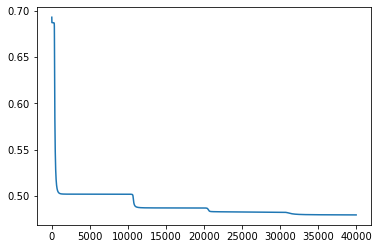

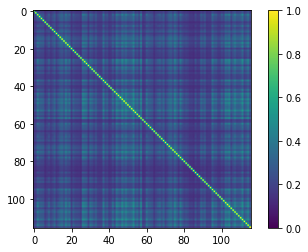

In [24]:
el_arr = [2e5]  #[1e4, 2e4, 5e4, 1e5, 2e5, 5e5]
e_arr = [2e0]  #[1e0, 2e0, 5e0, 1e1, 2e1, 5e1]

for el in el_arr:
    for e in e_arr:
        ## initialization
        ## The initialization part converts quantities from numpy to pytorch, 
        ## and gives some initial guesses, either random or based on eigenvalues.
        ## The model will try to recover the network modes h, and combination of modes in each patient
        ## It also explicitly estimates a diagonal as a nuisance variable, to avoid some of the issues we talked about


        # try a model with identity
        # lets start the optimization again
        # this time with a squashing function
        d = 4 #10

        l = torch.randn(N,d,requires_grad=True) ##a tensor filled with random numbers from a normal distribution with mean 0 and variance 1

        # my normalized h
        h = torch.randn(M,d)
        h /= torch.sqrt(torch.sum(h**2,0,keepdims=True))

        h.requires_grad = True


        # it would be nice to do something to the identity
        At = torch.tensor(As,dtype=h.dtype) ##a multi-dimensional matrix containing elements of a single data type.
        #for i in range(At.shape[-1]):
        #    At[:,i,i] = 0.5

        eiginit = False
        if eiginit:
            h = torch.symeig(torch.mean(At,0),eigenvectors=True)[1] ##returns eigenvalues and eigenvectors of a real symmetric or complex Hermitian matrix input or a batch thereof, represented by a namedtuple (eigenvalues, eigenvectors)
            h = h.flip(1)
            h = h[:,:d]
            h.requires_grad = True
            with torch.no_grad():
                hh_ = (h[:,None]*h).reshape(-1,d)
                At_ = At.reshape(At.shape[0],-1)            
                l = torch.solve((At_@hh_).T, (hh_.T@hh_) )[0].T ##returns the solution to the system of linear equations represented by AX = BAX=B and the LU factorization of A, in order as a namedtuple solution, LU.                           

            Ahat = (l[:,None,:]*h)@h.T
            print(f'err = {torch.sum((At-Ahat)**2)*0.5}')
            f,ax = plt.subplots()
            im = ax.imshow(torch.mean(Ahat,0).detach().cpu().numpy())
            plt.colorbar(im)

            l.requires_grad = True

        leye = torch.zeros(N,1,dtype=h.dtype,requires_grad=True)
        eye = torch.eye(M,dtype=h.dtype)
        
        ## Estimation
        ## it uses a binary cross entropy loss rather than a sum of square error loss
        ## this has an advantage, our estimated adjacency matrix always has values in the range [0,1], which we want
        ## using sum of square error loss gives simpler solutions in terms of eigendecompositions, 
        ## but doesn't give us meaningful results (except in the limit of infinite samples)
        ## see if you can construct your adjacency matrics and run this code as well

        # I'd like to include a constant and identity
        # now constant is in the model, just take h=constant, so I don't need this
        # identity is NOT in the model, increase step size by 10 fold until too big

        # lets go through iteratively
        f,ax = plt.subplots()
        f2,ax2 = plt.subplots()
        Esave = []
        niter = 10000 ##for small iteration

        #el = 1e4  ######do this one first, original 
        n_draw = 500
        for d_ in range(d):
            for it in range(niter):
                hd = h[:,:d_+1]
                ld = l[:,:d_+1]                        

                Ahat0 = (ld[:,None,:]*hd)@hd.T + eye*leye[:,None,:]
                Ahat = torch.sigmoid(Ahat0)
                #E = torch.sum((Ahat - At)**2)*0.5
                # or use binary cross entropy        
                E = torch.nn.functional.binary_cross_entropy_with_logits(Ahat0,At,reduction='mean')
                Esave.append(E.item())        


                if not it%n_draw or it==niter-1:
                    ax.cla()
                    ax.plot(Esave)
                    f.canvas.draw()
                    
                    f_out = "joint_graphs/itr=10000_el=" + str(el) + "_e=" + str(e) + "_f.png"
                    f.savefig(f_out)

                    f2.clf()
                    ax2 = f2.add_subplot()
                    im = ax2.imshow(torch.mean(Ahat.clone().detach(),0).cpu().numpy(),vmin=0.0,vmax=1.0)
                    plt.colorbar(im)
                    f2.canvas.draw()
                    
                    f2_out = "joint_graphs/itr=10000_el=" + str(el) + "_e=" + str(e) + "_f2.png"
                    f2.savefig(f2_out)

                    
                # now update
                E.backward()
                with torch.no_grad():
                    # it doesn't make sense to update h without l!
                    # it may make sense to update l without h

                    #if not (it//1000)%2:

                    # we want the grad to be normal to its corresponding h            

                    # here update all
                    update_all = False
                    if update_all:
                        hgrad = h.grad[:,:d_+1]*e    
                        hgrad = hgrad - torch.sum(hgrad*hd,0)*hd            
                        # I should do something here to control the stepsize
                        h[:,:d_+1] -= hgrad # update all on this line
                    else:
                        # here update one
                        hgrad = e*h.grad[:,d_]
                        hgrad = hgrad - torch.sum(hgrad*hd[:,-1],0)*hd[:,-1]
                        h[:,d_] -= hgrad # only update one on this line



                    h /= torch.sqrt(torch.sum(h**2,0,keepdims=True))


                    # update all the l
                    l -= el*l.grad            
                    leye -= el*leye.grad

                    h.grad.zero_()
                    l.grad.zero_()
                    leye.grad.zero_()
            print(Esave[-1])
            print(ld)


In [28]:
print(l.shape)
print(h.shape)

np.savetxt('l_494by4.csv', l.detach().numpy(), delimiter=',')
np.savetxt('h_116by4.csv', h.detach().numpy(), delimiter=',')

torch.Size([494, 4])
torch.Size([116, 4])


In [32]:
l = l.detach().numpy()
h = h.detach().numpy()

In [72]:
### by dimension: each iteration I take the max of 4 possible ratios; run 10,000 times then take 95 percentile
### first define function to find the max ratio of 4 dimensions
### l = 494*4, h=116*4 -> take each dimension from l and h and multiply l*h.t() to get 494*116 matrix
### take mean of 116 structures per patient; then find mean of each group of patients
### ratio = combined_SSE/(normal_SSE+AD_SSE)

### 4 F-type statistics

def find_max_ratio_byDim(normal):
    max_ratio_byDim = 0
    arr = np.zeros(4)
    
    for i in range(4):
        l_dim = np.zeros((494,1))
        h_dim = np.zeros((116,1))

        l_dim[:,0] = l[:,i]
        h_dim[:,0] = h[:,i]

        byDim = np.matmul(l_dim, np.transpose(h_dim))
        pat_mean = np.mean(byDim, axis=1)
        #print(pat_mean.shape)

        combined_stats = pat_mean
        normal_stats = np.zeros(len(normal_group))
        AD_stats = np.zeros(len(AD_group))
        normal_itr = 0
        AD_itr = 0
        for j in range(len(combined_group)):
            p = combined_group[j]
            if p in normal:
                normal_stats[normal_itr] = pat_mean[j]
                normal_itr += 1
            else:
                AD_stats[AD_itr] = pat_mean[j]
                AD_itr += 1

        normal_SSE = np.sum(np.square(np.subtract(normal_stats, np.mean(normal_stats))))
        AD_SSE = np.sum(np.square(np.subtract(AD_stats, np.mean(AD_stats))))
        combined_SSE = np.sum(np.square(np.subtract(combined_stats, np.mean(combined_stats))))

    #     print(normal_SSE, AD_SSE, combined_SSE)

        ratio = combined_SSE/(normal_SSE + AD_SSE)
        arr[i] = ratio
        if ratio > max_ratio_byDim:
            max_ratio_byDim = ratio
    return max_ratio_byDim, arr

In [73]:
###simulation 10,000 to find 95 percentile
real_max_byDim, ratio_byDim = find_max_ratio_byDim(normal_group)
print(real_max_byDim)
print(ratio_byDim)

max_byDim_arr = np.zeros(10000)
temp_arr = np.zeros(4)
for i in range(10000):
    simulated_normal = np.random.choice(combined_group, len(normal_group), replace=False)
    #simulated_normal = np.setdiff1d(combined_group, AD_group)
    
    max_byDim_arr[i], temp_arr = find_max_ratio_byDim(simulated_normal)
byDim_cutoff_threshold = np.percentile(max_byDim_arr, 95)
print(byDim_cutoff_threshold)

1.0742127915160224
[1.05976131 1.07421279 1.03265397 1.00627489]
1.01245317599314


In [74]:
### find significant dimensions
for r in range(len(ratio_byDim)):
    if ratio_byDim[r] > byDim_cutoff_threshold:
        print("we reject the null for dimention " + str(r))

we reject the null for dimention 0
we reject the null for dimention 1
we reject the null for dimention 2


In [81]:
#### now by structure across dimensions
#### for each structure, l = 494*4, h = 4*1 -> matrix of sum of patient structure across all dimensions

def find_max_ratio_byStruct(normal):
    max_ratio_byDim = 0
    arr = np.zeros(116)
    
    for i in range(116):
        h_struct = np.zeros((1,4))
        h_struct[0,:] = h[i,:]

        byStruct = np.matmul(l, np.transpose(h_struct))

        combined_stats = byStruct
        normal_stats = np.zeros(len(normal_group))
        AD_stats = np.zeros(len(AD_group))
        normal_itr = 0
        AD_itr = 0
        for j in range(len(combined_group)):
            p = combined_group[j]
            if p in normal:
                normal_stats[normal_itr] = byStruct[j]
                normal_itr += 1
            else:
                AD_stats[AD_itr] = byStruct[j]
                AD_itr += 1

        normal_SSE = np.sum(np.square(np.subtract(normal_stats, np.mean(normal_stats))))
        AD_SSE = np.sum(np.square(np.subtract(AD_stats, np.mean(AD_stats))))
        combined_SSE = np.sum(np.square(np.subtract(combined_stats, np.mean(combined_stats))))

        ratio = combined_SSE/(normal_SSE + AD_SSE)
        arr[i] = ratio
        if ratio > max_ratio_byDim:
            max_ratio_byDim = ratio
    return max_ratio_byDim, arr

In [82]:
###simulation 10,000 to find 95 percentile
real_max_byStruct, ratio_byStruct = find_max_ratio_byStruct(normal_group)
print(real_max_byStruct)
print(ratio_byStruct.shape)

max_byStruct_arr = np.zeros(10000)
temp_arr2 = np.zeros(116)
for i in range(10000):
    simulated_normal = np.random.choice(combined_group, len(normal_group), replace=False)
    #simulated_normal = np.setdiff1d(combined_group, AD_group)
    
    max_byStruct_arr[i], temp_arr2 = find_max_ratio_byStruct(simulated_normal)
    
    if i%1000 == 0:
        print(str(i) + " done")
byStruct_cutoff_threshold = np.percentile(max_byStruct_arr, 95)
print(byStruct_cutoff_threshold)

1.1012757828021138
(116,)
0 done
1000 done
2000 done
3000 done
4000 done
5000 done
6000 done
7000 done
8000 done
9000 done
1.0137201784897005


In [83]:
### find significant structures
for r in range(len(ratio_byStruct)):
    if ratio_byStruct[r] > byStruct_cutoff_threshold:
        print("we reject the null for structure " + str(r) + " with ratio " + str(ratio_byStruct[r]))

we reject the null for structure 0 with ratio 1.0665894946809684
we reject the null for structure 6 with ratio 1.0644435899292828
we reject the null for structure 9 with ratio 1.055901428166553
we reject the null for structure 12 with ratio 1.0468865500923414
we reject the null for structure 20 with ratio 1.0658242199035666
we reject the null for structure 23 with ratio 1.0252740154561777
we reject the null for structure 24 with ratio 1.0327789243637069
we reject the null for structure 25 with ratio 1.0530390919633288
we reject the null for structure 29 with ratio 1.0378292944880756
we reject the null for structure 32 with ratio 1.0160696115408905
we reject the null for structure 34 with ratio 1.0682075901365085
we reject the null for structure 35 with ratio 1.078636414312615
we reject the null for structure 36 with ratio 1.0519986352993693
we reject the null for structure 38 with ratio 1.016039166021403
we reject the null for structure 39 with ratio 1.014638492238526
we reject the nul

In [4]:
l = pd.read_csv('l_494by4.csv', sep=',',header=None).values
h = pd.read_csv('h_116by4.csv', sep=',',header=None).values

In [6]:
#### now by structure and dimension: 116*4
#### for pair, l = 494*1, h = 1*1 -> multiple to get result
### 494 patients

def find_max_ratio_byAll(normal):
    max_ratio_byAll = 0    
    arr = np.zeros((116,4))
    
    for i in range(4):
        for j in range(116):
            all_pat_byDimStruct = np.zeros(len(combined_group))
            normal_pat_byDimStruct = np.zeros(len(normal))
            AD_pat_byDimStruct = np.zeros((len(combined_group)-len(normal)))
            
            normal_counter = 0
            AD_counter = 0
            
            h_scalar = h[j,i]
            for p in range(len(combined_group)): ##in range 494, first set all the values by dim+struct per patient
                pat = combined_group[p]
                l_scalar = l[p,i]
                all_pat_byDimStruct[p] = l_scalar*h_scalar
                
            for k in range(len(combined_group)): ##now find SSE for normal, AD and combined
                pati = combined_group[k]
                if pati in normal:
                    normal_pat_byDimStruct[normal_counter] = all_pat_byDimStruct[k]
                    normal_counter += 1
                else:
                    AD_pat_byDimStruct[AD_counter] = all_pat_byDimStruct[k]
                    AD_counter += 1
            
            normal_SSE = np.sum(np.square(np.subtract(normal_pat_byDimStruct, np.mean(normal_pat_byDimStruct))))
            AD_SSE = np.sum(np.square(np.subtract(AD_pat_byDimStruct, np.mean(AD_pat_byDimStruct))))
            combined_SSE = np.sum(np.square(np.subtract(all_pat_byDimStruct, np.mean(all_pat_byDimStruct))))
            
            ratio = combined_SSE/(normal_SSE + AD_SSE)
            arr[j,i] = ratio
            if ratio > max_ratio_byAll:
                max_ratio_byAll = ratio
    
    return max_ratio_byAll, arr

In [ ]:
###simulation 10,000 to find 95 percentile
real_max_byAll, ratio_byAll = find_max_ratio_byAll(normal_group)
print(real_max_byAll)
print(ratio_byAll.shape)

max_byAll_arr = np.zeros(10000)
temp_arr3 = np.zeros((116,4))
for i in range(10000):
    simulated_normal = np.random.choice(combined_group, len(normal_group), replace=False)
    #simulated_normal = np.setdiff1d(combined_group, AD_group)
    
    max_byAll_arr[i], temp_arr3 = find_max_ratio_byAll(simulated_normal)
    
    if i%1000 == 0:
        print(str(i) + " done")
byAll_cutoff_threshold = np.percentile(max_byAll_arr, 95)
print(byAll_cutoff_threshold)

1.074212791516023
(116, 4)
0 done
1000 done


In [ ]:
### find significant structure and dim combo
for r in range(116):
    for c in range(4):
        if ratio_byAll[r,c] > byAll_cutoff_threshold:
            print("we reject the null for structure " + str(r) + " dim " + str(c) + 
                  " with ratio " + str(ratio_byAll[r,c]))